<a href="https://colab.research.google.com/github/MYoussef885/License-Plate-Recognition/blob/main/License_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install easyocr
!pip install imutils
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [41]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

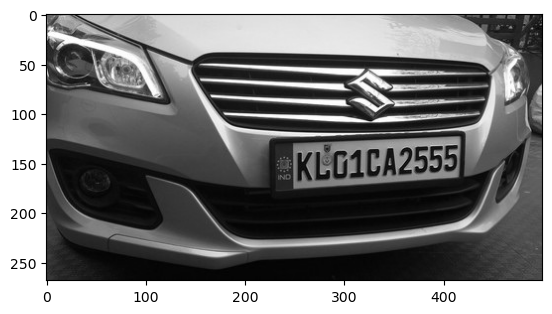

In [42]:
img = cv2.imread("/Users/rishisawhney/PycharmProjects/pythonProject8/images/Cars0.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

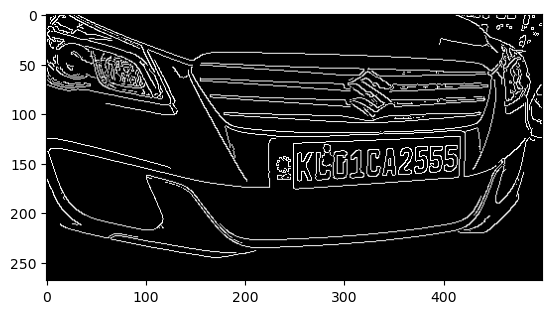

In [43]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [44]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [45]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [46]:
location

array([[[417, 123]],

       [[249, 130]],

       [[249, 175]],

       [[415, 164]]], dtype=int32)

In [47]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

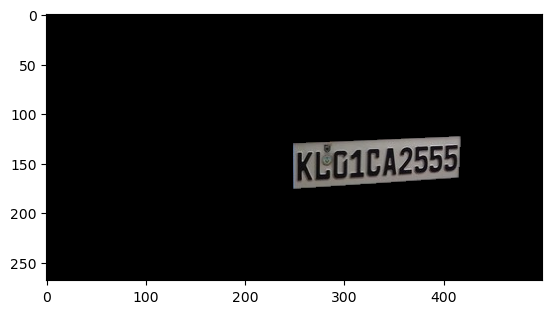

In [48]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [49]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

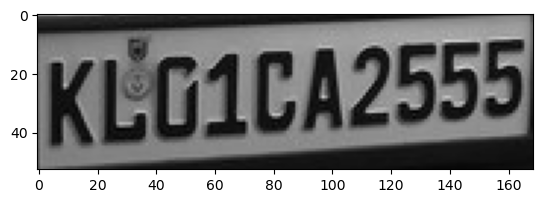

In [50]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [51]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.5068456937706268)]

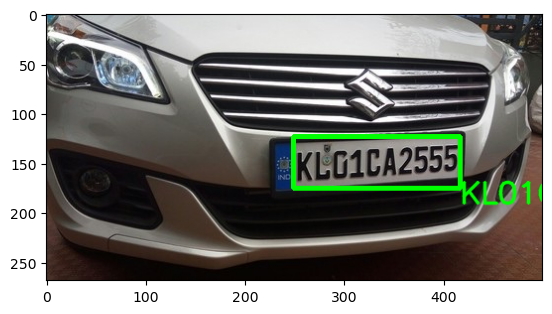

In [52]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


# Load the EasyOCR reader
reader = easyocr.Reader(['en'])

# Load the image
img = cv2.imread("/Users/rishisawhney/PycharmProjects/pythonProject8/images/Cars0.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection
edged = cv2.Canny(gray, 30, 200)

# Contour detection
contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# Process each contour
for contour in contours:
    # Compute the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Crop the object region
    cropped_image = gray[y:y + h, x:x + w]

    # Perform OCR on the cropped image
    result = reader.readtext(cropped_image)

    # Draw bounding box and label
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    if result:
        text = result[0][-2]
        cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the final image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

